In [1]:
from numpy.linalg import eig
import numpy as np
sigma = np.array([
    [0.838, 0.049, 0.138, -0.04, -0.067],
    [0.049, 0.838, 0.178, -0.309, 0.136],
    [0.138, 0.178, 0.264, 0.172, 0.117], 
    [-0.04, -0.309, 0.172, 1.557, -0.534],
    [-0.067, 0.136, 0.117, -0.534, 1.17]
    ])
eigenvalues, eigenvectors = np.linalg.eig(sigma)
# print(eigenvalues)
# [2.02459283 0.10933164 0.73797176 0.94142879 0.85367497]

# eighenvalues由大到小排序是順序是[0 3 4 2 1]
e_indices = np.argsort(eigenvalues)[::-1]


# 排序後得到eigenvalues_sorted, eigenvectors_sorted
eigenvectors_sorted = eigenvectors[:,e_indices]
eigenvalues_sorted = eigenvalues[e_indices]


# pc1就是eigenvectors_sorted的第一個column vector
pc1 = eigenvectors_sorted[:,0]
print("pc1 is", pc1)
print(eigenvectors_sorted)

pc1 is [-0.00583021 -0.26774382  0.01465292  0.79842881 -0.53905101]
[[-0.00583021 -0.76329176  0.14063553 -0.60367293 -0.18207784]
 [-0.26774382 -0.47462436  0.26745993  0.74688404 -0.27143025]
 [ 0.01465292 -0.1892971   0.40458001  0.06434132  0.89225955]
 [ 0.79842881  0.0974124   0.53863517  0.06745727 -0.24154489]
 [-0.53905101  0.38313814  0.67444348 -0.26277927 -0.19672883]]


In [3]:
eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T # sigma = PDP'

array([[ 0.838,  0.049,  0.138, -0.04 , -0.067],
       [ 0.049,  0.838,  0.178, -0.309,  0.136],
       [ 0.138,  0.178,  0.264,  0.172,  0.117],
       [-0.04 , -0.309,  0.172,  1.557, -0.534],
       [-0.067,  0.136,  0.117, -0.534,  1.17 ]])

In [4]:
variance_explained = []
for i in eigenvalues_sorted:
     variance_explained.append((i/sum(eigenvalues_sorted))*100)
        
print(variance_explained)

[43.381033503547464, 20.172033250855133, 18.2917286225362, 15.812551093215419, 2.342653529845788]


In [2]:
import matplotlib.pyplot as plt
PC_i = np.arange(1,6)
plt.plot(PC_i, variance_explained, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

NameError: name 'variance_explained' is not defined

In [3]:
import pandas as pd
behavior = pd.read_csv("survey_response_data.csv")
the_seven_var_df = behavior[['id','clients', 'suppliers', 'banks', 'investors', 'lawyers', 'politicians', 'govoff']]

In [4]:
sum_we_care = the_seven_var_df.groupby('id').agg(
    {
    "clients": lambda x: sum(x==1),
    'suppliers': lambda x: sum(x==1),
    "banks": lambda x: sum(x==1),
    "investors": lambda x: sum(x==1),
    "lawyers": lambda x: sum(x==1),
    "politicians": lambda x: sum(x==1),
    "govoff": lambda x: sum(x==1),
    }
)
print(sum_we_care.shape)

(1115, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

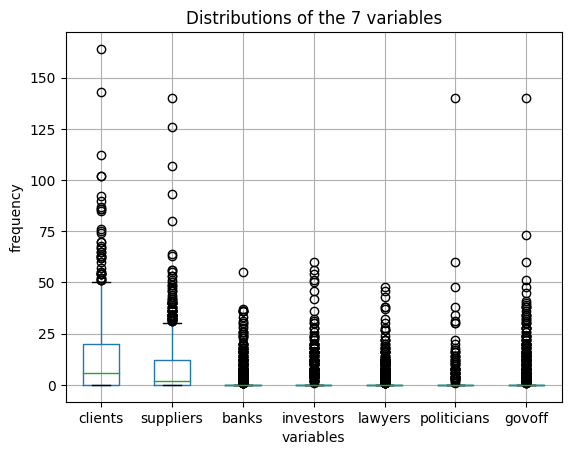

In [5]:
sum_we_care.boxplot(column = ['clients', 'suppliers', 'banks', 'investors', 'lawyers', 'politicians', 'govoff' ])
plt.title('Distributions of the 7 variables')
plt.xlabel('variables')
plt.ylabel('frequency')
plt.show

govoff    0.684302
Name: politicians, dtype: float64


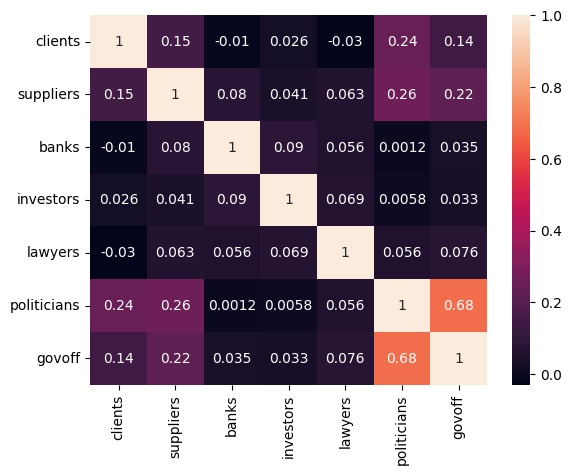

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = sum_we_care.corr()
print(corr["politicians"].drop(index="politicians").nlargest(1))
sns.heatmap(corr, annot=True)
plt.show()

[-0.28483603  0.92411215  0.0432697   0.02117622  0.03872141  0.13105055
  0.20950151]


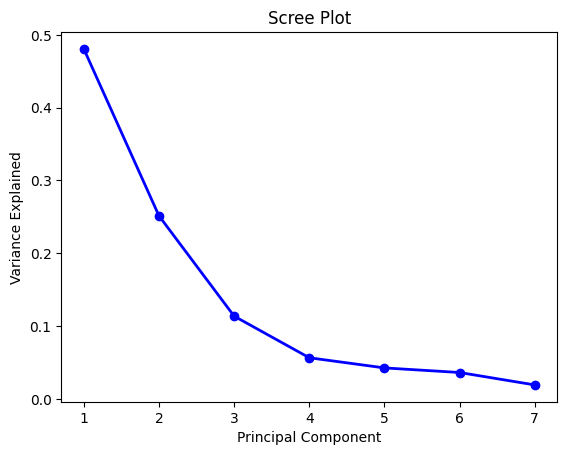

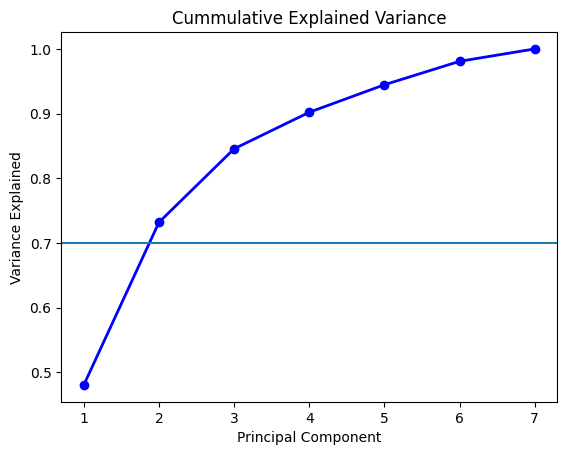

In [11]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=7)
pca.fit(sum_we_care)
PC_j = np.arange(pca.n_components_)+1  
pc1_in_e = pca.components_[1]
print(pc1_in_e)
plt.plot(PC_j, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

plt.plot(PC_j, pca.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue')
plt.axhline(y = 0.7)
plt.title('Cummulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


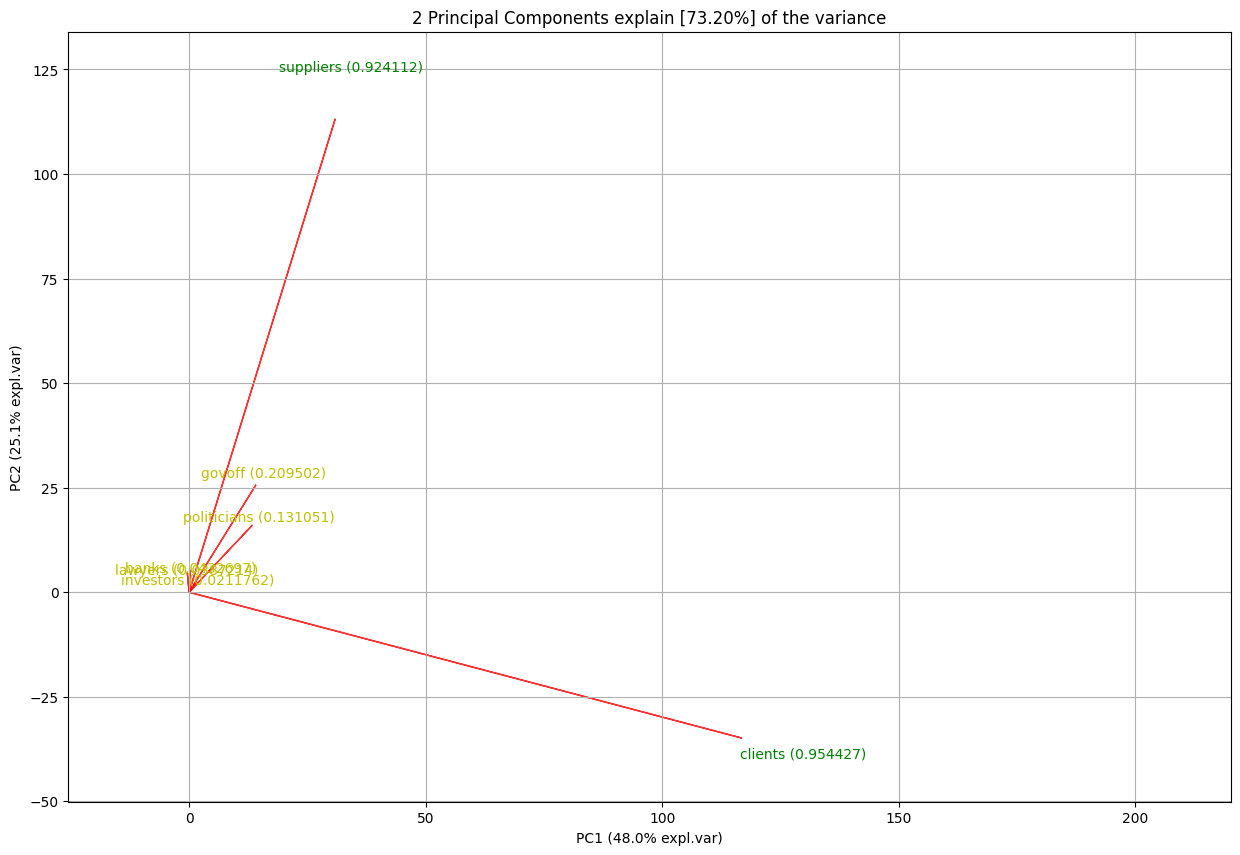

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [73.20%] of the variance'}, xlabel='PC1 (48.0% expl.var)', ylabel='PC2 (25.1% expl.var)'>)

In [34]:
from pca import pca
# Initialize
model = pca(normalize=False, n_components=2)
# Fit transform data
results = model.fit_transform(sum_we_care)
# Extract the most informative features
model.biplot(legend=False, label=None, cmap=None, PC = [0,1], verbose=0)

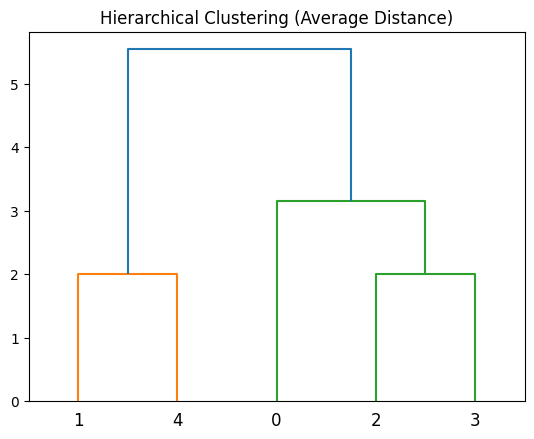

In [48]:
import scipy.cluster.hierarchy as sch
df_dict = {
                "x": [0, -3, 3, 3, -3],
                "y": [4, 1, 3, 5, 3]
}
df = pd.DataFrame(df_dict, columns=['x','y'])
ave_dis=sch.linkage(df,metric='euclidean',method='average')
sch.dendrogram(ave_dis)
plt.title('Hierarchical Clustering (Average Distance)')
plt.show()

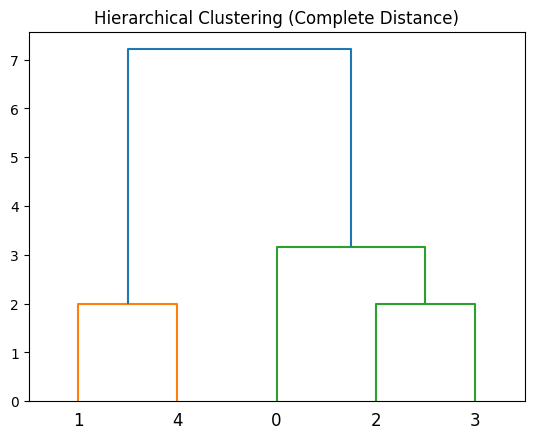

In [50]:

com_dis=sch.linkage(df,metric='euclidean',method='complete')
sch.dendrogram(com_dis)
plt.title('Hierarchical Clustering (Complete Distance)')
plt.show()